## Evaluation
### inference한 tif 파일과 slide image, annotation 의 path를 입력해서 evaluate

In [ ]:
import tensorflow.keras.losses.

In [31]:
!pip freeze

absl-py==0.8.1
alabaster==0.7.10
albumentations==1.0.0
anaconda-client==1.6.14
anaconda-project==0.8.2
asn1crypto==0.24.0
astor==0.8.0
astroid==1.6.3
astropy==3.0.2
attrs==18.1.0
autovizwidget==0.13.1
Babel==2.5.3
backcall==0.1.0
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.3
bokeh==1.0.4
boto==2.48.0
boto3==1.10.19
botocore==1.13.19
Bottleneck==1.2.1
cachetools==3.1.1
certifi==2019.11.28
cffi==1.11.5
chardet==3.0.4
click==6.7
cloudpickle==0.5.3
clyent==1.2.2
colorama==0.3.9
contextlib2==0.5.5
cryptography==2.8
cycler==0.10.0
Cython==0.28.2
cytoolz==0.9.0.1
dask==2021.3.0
datashape==0.5.4
decorator==4.3.0
defusedxml==0.6.0
distributed==1.21.8
docutils==0.14
efficientnet==1.0.0
entrypoints==0.2.3
enum34==1.1.6
environment-kernels==1.1.1
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.4
Flask==1.0.2
Flask-Cors==3.0.4
future==0.18.2
gast==0.2.2
gevent==1.3.0
glob2==0.6
gmpy2==2.0.8
google-auth==1.7.1
google-auth-o

In [1]:
from util import processor
from cfg import *
from metric import *
import matplotlib.pyplot as plt
import cv2 as cv
import os, glob

In [15]:
def slide_f1_score(slide_path,anno_path,tif_path):
    pr = cv.imread(tif_path,0)
    #pr = (pr.astype(np.float32)/255.0).astype(np.uint8)
    pr = pr.astype(np.uint8)
    init_params.update({
        'svs_path':slide_path,
        'xml_path':anno_path
    })
    slide = processor(init_params)
    masks = slide.get_anno_mask(tool='etc')
    gt = (masks['p_2']/255.0).astype(np.uint8)
    return compute_dist_f1_score(pr,gt)

def mean_f1_score(slide_path_list,anno_path_list,tif_path_list):
    '''
    Evaluation을 할 wsi 이미지, annotation xml, tif 파일을 쌍으로 갖는 list를 입력하여 f1-score의 평균값을 반환합니다
    '''
    list_len = len(slide_path_list)
    ret = 0
    for i in range(list_len):
        slide_score=slide_f1_score(slide_path_list[i],anno_path_list[i],tif_path_list[i])
        print(slide_score)
        ret+=slide_score
    ret/= list_len
    return ret

In [20]:
img = cv.imread(tif_path_list[0],0)
img2 = cv.imread(tif_path_list_2[0],0)

In [25]:
print(np.max(img),np.max(img2))

1 255


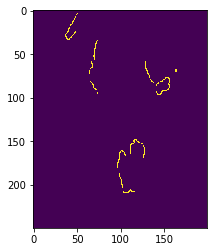

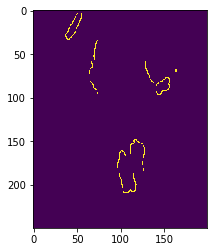

In [22]:
plt.figure(); plt.imshow(img[1250:1500,3300:3500])
plt.figure(); plt.imshow(img2[1250:1500,3300:3500])

In [27]:
print(slide_f1_score(svs_path_list[0],xml_path_list[0],tif_path_list[0]))
print(slide_f1_score(svs_path_list[0],xml_path_list[0],tif_path_list_2[0]))

0.47058823529411764
0.4444444444444444


In [6]:
tissue_name,patient_num = TEST_PATIENT_PATH[0].split('/')[-2:]
base_dir = '/home/centos/data/paip/'
tif_base_dir = '/home/centos/jupyter/pathology/data/validation/'
svs_path = base_dir + f'{tissue_name}/{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.svs'
xml_path = svs_path[:-3]+'xml'
tif_path = tif_base_dir + f'{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.tif'
print(os.path.exists(svs_path),svs_path)
print(os.path.exists(xml_path),xml_path)
print(os.path.exists(tif_path),tif_path)

True /home/centos/data/paip/pros/Pros_PNI2021chall_train_0024.svs
True /home/centos/data/paip/pros/Pros_PNI2021chall_train_0024.xml
True /home/centos/jupyter/pathology/data/validation/Pros_PNI2021chall_train_0024.tif


In [29]:
base_dir = '/home/centos/data/paip/'
tif_base_dir = '/home/centos/jupyter/pathology/results_dir/train/mixed/'
tif_base_dir_2 = '/home/centos/jupyter/pathology/results_dir/train/nerve/'
tif_base_dir_3 = '/home/centos/jupyter/pathology/results_dir/'
svs_path_list = list(); xml_path_list = list(); tif_path_list = list(); tif_path_list_2 = list(); tif_path_list_3 = list()
for d_path in TEST_PATIENT_PATH:
    tissue_name,patient_num = d_path.split('/')[-2:]
    svs_path = base_dir + f'{tissue_name}/{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.svs'
    xml_path = svs_path[:-3]+'xml'
    tif_path = tif_base_dir + f'{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.tif'
    tif_path2 = tif_base_dir_2+f'{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.tif'
    tif_path3 = tif_base_dir_3+f'{tissue_name.capitalize()}_PNI2021chall_train_{patient_num}.tif'
    if os.path.exists(tif_path):
        svs_path_list.append(svs_path)
        xml_path_list.append(xml_path)
        tif_path_list.append(tif_path)
        tif_path_list_2.append(tif_path2)
        tif_path_list_3.append(tif_path3)
print(len(svs_path_list),len(tif_path_list),len(tif_path_list_2),len(tif_path_list_3))

30 30 30 30


In [31]:
print(svs_path_list[0],'\n',xml_path_list[0],'\n',tif_path_list[0],'\n',tif_path_list_2[0])

/home/centos/data/paip/pros/Pros_PNI2021chall_train_0024.svs 
 /home/centos/data/paip/pros/Pros_PNI2021chall_train_0024.xml 
 /home/centos/jupyter/pathology/results_dir/train/mixed/Pros_PNI2021chall_train_0024.tif 
 /home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0024.tif


In [30]:
print('Overlap : ',mean_f1_score(svs_path_list,xml_path_list,tif_path_list_3))

0.42857142857142855
0.30000000000000004
0.1
0.19047619047619044
0.20833333333333331
0.25000000000000006
0.2085889570552147
0.3101604278074866
0.40540540540540543
0.2696629213483146
0.13846153846153847
0.08163265306122451
0.14084507042253522
0.5454545454545455
0.1176470588235294
0.13793103448275862
0.0
0.22222222222222218
0.1111111111111111
0.23529411764705882
0.10576923076923077
0.3706293706293707
0.043478260869565216
0.0909090909090909
0.18181818181818182
0.07142857142857142
0.4383561643835616
0.2837837837837838
0.14814814814814814
0.27777777777777773
Overlap :  0.21379655320670596


In [32]:
print('MIX : ',mean_f1_score(svs_path_list,xml_path_list,tif_path_list))


0.47058823529411764
0.34782608695652173
0.0
0.2
0.3333333333333333
0.4444444444444445
0.3541666666666667
0.5555555555555556
0.39999999999999997
0.43902439024390244
0.28571428571428575
0.0
0.13793103448275862
0.5333333333333333
0.4
0.2608695652173913
0.0
0.1818181818181818
0.09090909090909091
0.11764705882352941
0.06811145510835913
0.33333333333333337
0.13333333333333333
0.1739130434782609
0.24242424242424246
0.0
0.43373493975903615
0.2580645161290322
0.4375
0.5
MIX :  0.271119204211957


In [34]:
print('NOT MIX : ',mean_f1_score(svs_path_list,xml_path_list,tif_path_list_2))


0.4444444444444444
0.2777777777777778
0.2
0.19354838709677416
0.33333333333333337
0.4313725490196079
0.2905982905982906
0.5494505494505494
0.39999999999999997
0.3448275862068965
0.3373493975903615
0.07142857142857142
0.11538461538461536
0.5333333333333333
0.4
0.21428571428571425
0.0
0.15384615384615385
0.09090909090909091
0.1
0.06727828746177371
0.35714285714285715
0.09090909090909091
0.14035087719298245
0.37499999999999994
0.0
0.45652173913043476
0.2903225806451613
0.34615384615384615
0.32258064516129037
NOT MIX :  0.26427165728343166


In [24]:
for i in np.arange(0,4,1):
    print(i)

0
1
2
3


In [34]:

img = cv.imread('./results_dir/test/mixed/Pros_PNI2021chall_test_0012.tif')
np.mean(img)

6.719583837358118e-07

(2, 2)


array([[1., 2., 2., 1.],
       [0., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

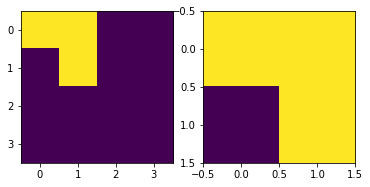

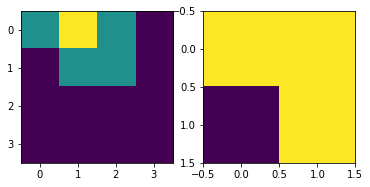

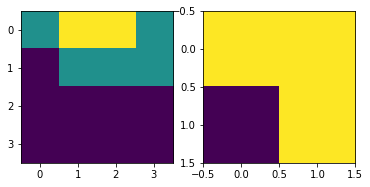

In [31]:
mask = np.zeros((4,4))
patch = np.array(((1,1),(0,1)))
print(patch.shape)
for i in np.arange(0,3,1):
    mask[0:2,i:i+2] += patch
    plt.figure()
    plt.subplot(1,2,1); plt.imshow(mask)
    plt.subplot(1,2,2); plt.imshow(patch)

mask

In [ ]:
print('NERVE : ',mean_f1_score(svs_path_list,xml_path_list,tif_path_list_2))

In [6]:
for fpath in tif_path_list_2:
    print(fpath)

/home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0024.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pan_PNI2021chall_train_0031.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Col_PNI2021chall_train_0003.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pan_PNI2021chall_train_0036.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pan_PNI2021chall_train_0014.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pan_PNI2021chall_train_0007.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0021.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0034.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0006.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pros_PNI2021chall_train_0009.tif
/home/centos/jupyter/pathology/results_dir/train/nerve/Pan_PNI2021chall_train_0019.tif
/home/centos/jupyter/pathology/results

In [8]:
init_params

{'level': 2,
 'overlap': 0.5,
 'patch_size': 512,
 'patch_dir': './patch_overlap_global_512_stain/'}

In [9]:
init_params.update({'svs_path':svs_path,'xml_path':xml_path})
slide = processor(init_params)

In [10]:
msk = slide.get_tissue_mask()

In [12]:
cnts = cv.findContours(msk.astype(np.uint8), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)[0]

In [13]:
len(cnts)

248

In [27]:
tif_path = '/home/centos/jupyter/pathology/results_dir/Pan_PNI2021chall_train_0031.tif'
fname = tif_path.split('/')[-1]
tif_path2 = f'/home/centos/jupyter/pathology/results_dir/train/mixed/{fname}'
tif_path3 = f'/home/centos/jupyter/pathology/results_dir/train/nerve/{fname}'
tissue_name = tif_path.split('/')[-1].split('_')[0] ; patient_num = tif_path[-8:-4]
svs_path = f'/home/centos/data/paip/{tissue_name.lower()}/{tissue_name}_PNI2021chall_train_{patient_num}.svs'
xml_path = svs_path[:-3]+'xml'
if os.path.exists(svs_path):
    print(svs_path,'\n',xml_path)
print(slide_f1_score(svs_path,xml_path,tif_path))
print(slide_f1_score(svs_path,xml_path,tif_path2))
print(slide_f1_score(svs_path,xml_path,tif_path3))

/home/centos/data/paip/pan/Pan_PNI2021chall_train_0031.svs 
 /home/centos/data/paip/pan/Pan_PNI2021chall_train_0031.xml
0.30000000000000004
0.34782608695652173
0.2777777777777778
